# <center> ★ Machine Learning Project - BMI Assessment ★

---

<img src="bmi.jpg" style="width: 300px;"/>

---

### Description:

A simple yet challenging project, to estimate the BMI based on the Gender, Height & Weight.
The complexity arises due the fact that dataset has less samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

**This data frame contains the following columns:**

* Gender : Male / Female

* Height : Number (cm)

* Weight : Number (Kg)

* Index :
0 - Extremely Weak
1 - Weak
2 - Normal
3 - Overweight
4 - Obesity
5 - Extreme Obesity

**Source:**

Kaggle - 
https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification models to predict the various categories of BMI.
- Compare the evaluation metrics of vaious classification algorithms.

---

## <center>1. Data Exploration

In [265]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [364]:
#Importing the dataset


df = pd.read_csv('bmi.csv')

target = 'Index'
labels = ['Extremely Weak','Weak','Normal','Overweight','Obsesity','Extreme Obesity']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3



Inference: The Datset consists of 4 features & 500 samples.


In [267]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [268]:
#Checking number of unique rows in each feature

df.nunique()

Gender      2
Height     60
Weight    110
Index       6
dtype: int64

In [269]:
#Checking the stats of all the columns

display(df.describe())

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


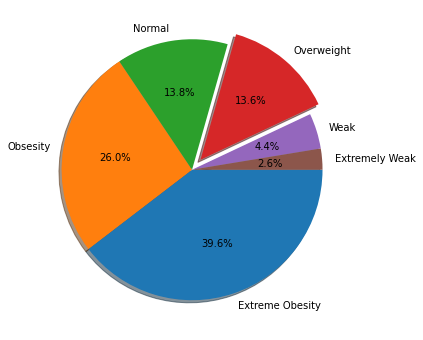

In [379]:
#Let us first analyze the distribution of the target variable

MAP={}
for i in range(len(labels)):
    MAP[i]=labels[i]
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[3]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1)
plt.show()

**Inference:** The Target Variable seems to be quiet imbalanced! We shall try to fix this by augmenting data...

                                         Visualising Categorical Features:                                          


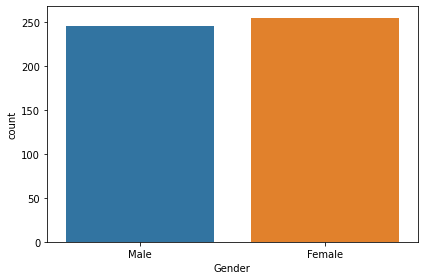

In [271]:
#Visualising the categorical features 

cf = ['Gender']

print('\033[1mVisualising Categorical Features:'.center(120))

f, a0 = plt.subplots(1, 1, figsize=[6,4]) #gridspec_kw={'width_ratios': [1, 1]}
sns.countplot(df[cf[0]], ax=a0)
#sns.countplot(df[cf[1]], ax=a1)
f.tight_layout()
f.show()

                                                    Features Distribution                                                     


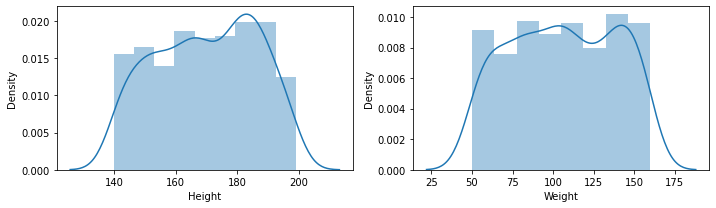

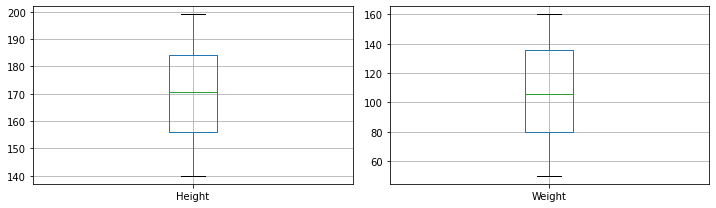

In [272]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(130))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/4)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/4),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/4)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/4),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are no outliers present in the dataset..

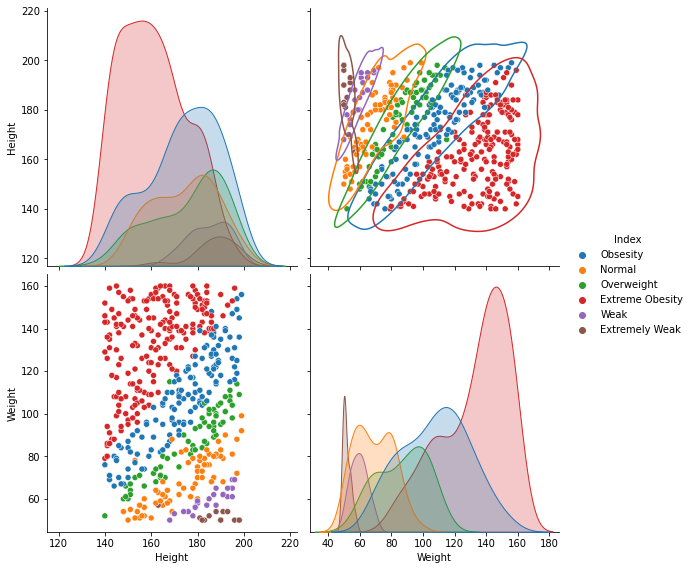


Inference: The data samples of most of the features don't show an exact pattern. Also they seemto have lot of overlap for the outcome classes, making it difficult to be distingusihable.


In [273]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

print('\n\033[1mInference:\033[0m The data samples of most of the features don\'t show an exact pattern. Also they seem\
to have lot of overlap for the outcome classes, making it difficult to be distingusihable.')

---

## <center> 3. Data Preprocessing

In [274]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

Inference: The dataset doesn't have any null elements


In [275]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 11


In [276]:
#Converting categorical Columns to Numeric

from sklearn.preprocessing import OneHotEncoder

#One-Hot Binay Encoding
oh=True
for i in cf:
    #print(i)
    if df1[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i)
        df1[i]=pd.get_dummies(df1[i], drop_first=True, prefix=str(i))
    if (df1[i].nunique()>2 and df1[i].nunique()<15):
        if oh==True: print("\nDummy Encoding on features:")
        print(i)
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], drop_first=True, prefix=str(i)))],axis=1)
    

One-Hot Encoding on features:
Gender


In [277]:
#Fixing the imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE

print('Original class distribution:')
print(df1[target].value_counts())

xf = df1.columns
X = df1.drop([target],axis=1)
Y = df1[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df2 = pd.DataFrame(X, columns=xf)
df2[target] = Y
df = df2.copy()

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
5    195
4    128
2     69
3     64
1     20
0     13
Name: Index, dtype: int64

Class distribution after applying SMOTE Technique:
4    195
2    195
3    195
5    195
1    195
0    195
Name: Index, dtype: int64


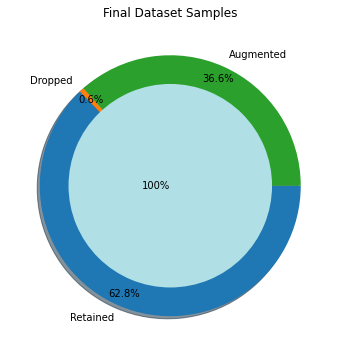


Inference:The final dataset after cleanup has 4 samples & 1170 rows.


In [278]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df1.shape[0], df2.shape[0]-df1.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[1], df.shape[0]))

---

## <center> 4. Data Manipulation

In [283]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (1170, 3) (1170,) 
Training set  --->  (936, 3) (936,) 
Testing set   --->  (234, 3)  (234,)


In [284]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(130))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(130))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                              Standardardization on Training set                                              


,Gender,Height,Weight
count,9.360000e+02,936.000000,9.360000e+02
mean,-7.211705e-17,0.000000,-2.315337e-16
std,1.000535e+00,1.000535,1.000535e+00
min,-7.413966e-01,-2.403163,-1.075810e+00
25%,-7.413966e-01,-0.734300,-8.921308e-01
50%,-7.413966e-01,0.267018,-2.645616e-01
75%,1.348806e+00,0.801054,6.997521e-01
max,1.348806e+00,1.535354,2.291635e+00



                                               Standardardization on Testing set                                               


,Gender,Height,Weight
count,234.000000,234.000000,234.000000
mean,-0.062527,0.040794,-0.066884
std,0.980929,1.009011,0.974251
min,-0.741397,-2.403163,-1.075810
25%,-0.741397,-0.600791,-0.922744
50%,-0.741397,0.300395,-0.432934
75%,1.348806,0.851120,0.638526
max,1.348806,1.468600,2.107956


---

## <center> 5. Feature Selection/Extraction

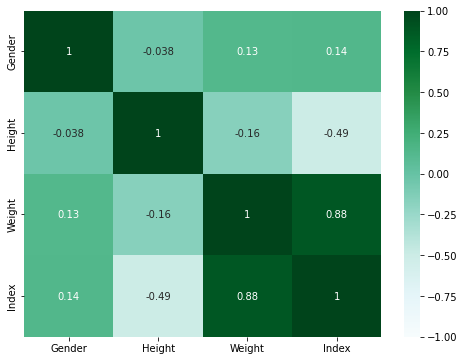

In [285]:
#Checking the correlation

plt.figure(figsize=[8,6])
sns.heatmap(df.corr(), cmap='BuGn', annot=True, vmin=-1, vmax=1)
plt.show()

**Inference:** Correlation plt between the variables convey lot of information about the realationship betweem them. The features do not have high collinearity between them, hence we do not need to perform any Feature Selection/Extraction...

---

## <center> 6. Predictive Modeling

In [288]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [323]:
#Let us define functions to summarise the Prediction's scores .

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 88.9%
F1 Score = 88.8%

 Confusiton Matrix:
 [[38  0  0  0  0  0]
 [12 35  1  0  0  0]
 [ 0  2 33  4  1  0]
 [ 0  0  0 34  1  0]
 [ 0  0  0  4 35  1]
 [ 0  0  0  0  0 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        38
           1       0.95      0.73      0.82        48
           2       0.97      0.82      0.89        40
           3       0.81      0.97      0.88        35
           4       0.95      0.88      0.91        40
           5       0.97      1.00      0.99        33

    accuracy                           0.89       234
   macro avg       0.90      0.90      0.89       234
weighted avg       0.90      0.89      0.89       234



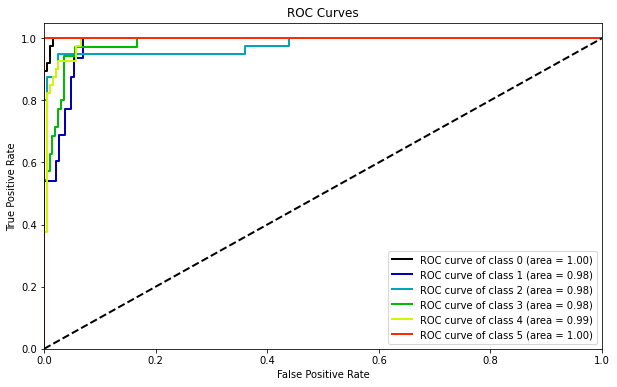

In [325]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(Train_X_std, Train_Y)
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 92.7%
F1 Score = 92.80000000000001%

 Confusiton Matrix:
 [[38  0  0  0  0  0]
 [ 0 48  0  0  0  0]
 [ 1  0 36  2  1  0]
 [ 0  0  1 30  4  0]
 [ 0  0  1  1 36  2]
 [ 0  0  0  1  3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        48
           2       0.95      0.90      0.92        40
           3       0.88      0.86      0.87        35
           4       0.82      0.90      0.86        40
           5       0.94      0.88      0.91        33

    accuracy                           0.93       234
   macro avg       0.93      0.92      0.92       234
weighted avg       0.93      0.93      0.93       234



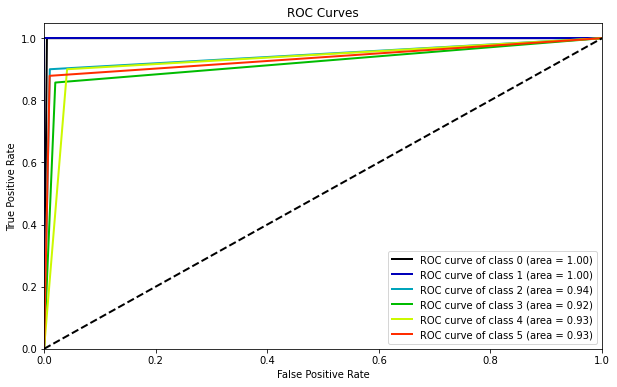

In [327]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(Train_X_std, Train_Y)
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 95.3%
F1 Score = 95.3%

 Confusiton Matrix:
 [[38  0  0  0  0  0]
 [ 0 48  0  0  0  0]
 [ 1  0 38  0  1  0]
 [ 0  0  0 32  3  0]
 [ 0  0  2  1 35  2]
 [ 0  0  0  0  1 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        48
           2       0.95      0.95      0.95        40
           3       0.97      0.91      0.94        35
           4       0.88      0.88      0.88        40
           5       0.94      0.97      0.96        33

    accuracy                           0.95       234
   macro avg       0.95      0.95      0.95       234
weighted avg       0.95      0.95      0.95       234



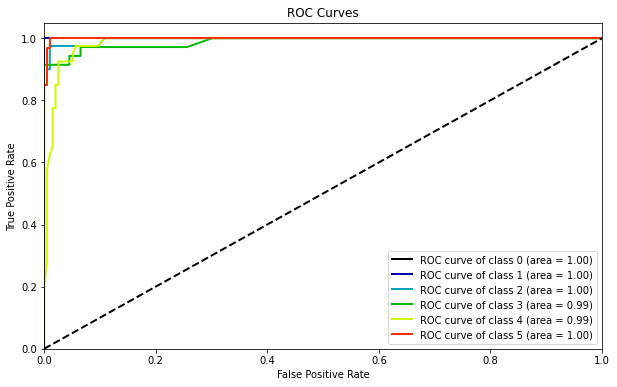

In [328]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier().fit(Train_X_std, Train_Y)
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 74.8%
F1 Score = 74.7%

 Confusiton Matrix:
 [[37  1  0  0  0  0]
 [11 34  3  0  0  0]
 [ 0  2 29  9  0  0]
 [ 0  0 12 15  8  0]
 [ 0  0  3  8 29  0]
 [ 0  0  0  0  2 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        38
           1       0.92      0.71      0.80        48
           2       0.62      0.72      0.67        40
           3       0.47      0.43      0.45        35
           4       0.74      0.72      0.73        40
           5       1.00      0.94      0.97        33

    accuracy                           0.75       234
   macro avg       0.75      0.75      0.75       234
weighted avg       0.76      0.75      0.75       234



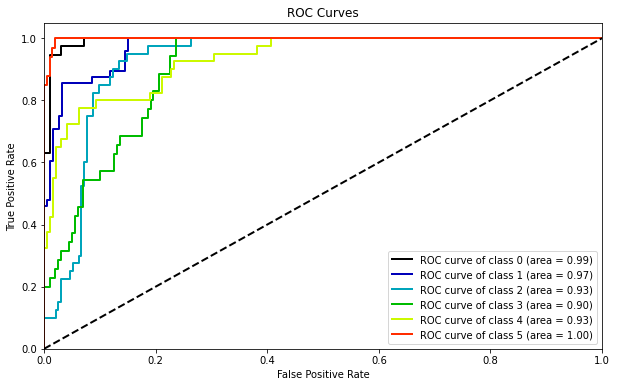

In [329]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB().fit(Train_X_std, Train_Y)
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 93.2%
F1 Score = 93.2%

 Confusiton Matrix:
 [[38  0  0  0  0  0]
 [ 1 47  0  0  0  0]
 [ 0  0 36  2  2  0]
 [ 0  0  0 34  1  0]
 [ 0  0  0  5 33  2]
 [ 0  0  0  0  3 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.98      0.99        48
           2       1.00      0.90      0.95        40
           3       0.83      0.97      0.89        35
           4       0.85      0.82      0.84        40
           5       0.94      0.91      0.92        33

    accuracy                           0.93       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.94      0.93      0.93       234



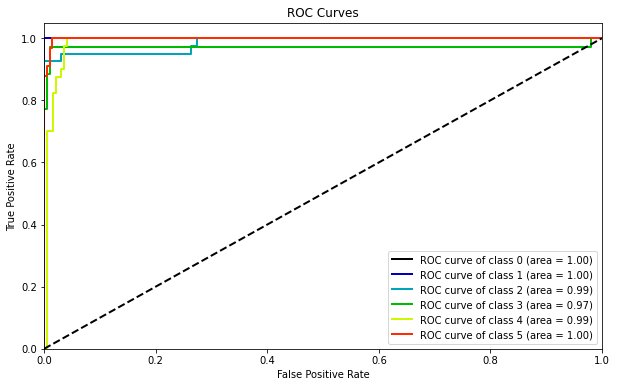

In [330]:
from sklearn.svm import SVC

SVM = SVC(probability=True).fit(Train_X_std, Train_Y)
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 94.39999999999999%
F1 Score = 94.5%

 Confusiton Matrix:
 [[38  0  0  0  0  0]
 [ 0 48  0  0  0  0]
 [ 0  0 38  1  1  0]
 [ 0  0  0 32  3  0]
 [ 0  0  1  2 35  2]
 [ 0  0  0  0  3 30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        48
           2       0.97      0.95      0.96        40
           3       0.91      0.91      0.91        35
           4       0.83      0.88      0.85        40
           5       0.94      0.91      0.92        33

    accuracy                           0.94       234
   macro avg       0.94      0.94      0.94       234
weighted avg       0.95      0.94      0.94       234



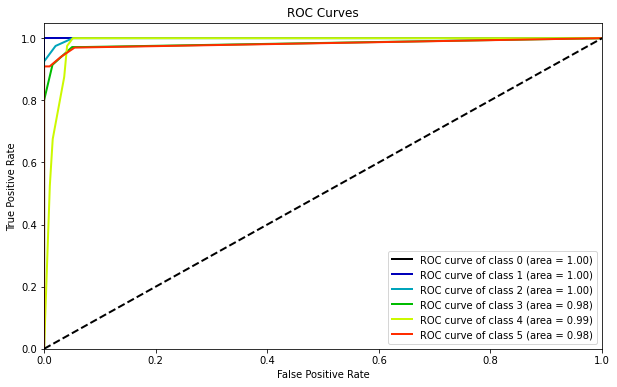

In [339]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(Train_X_std, Train_Y)
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 95.7%
F1 Score = 95.8%

 Confusiton Matrix:
 [[38  0  0  0  0  0]
 [ 0 48  0  0  0  0]
 [ 1  0 37  1  1  0]
 [ 0  0  0 33  2  0]
 [ 0  0  0  1 39  0]
 [ 0  0  0  0  4 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        48
           2       1.00      0.93      0.96        40
           3       0.94      0.94      0.94        35
           4       0.85      0.97      0.91        40
           5       1.00      0.88      0.94        33

    accuracy                           0.96       234
   macro avg       0.96      0.95      0.96       234
weighted avg       0.96      0.96      0.96       234



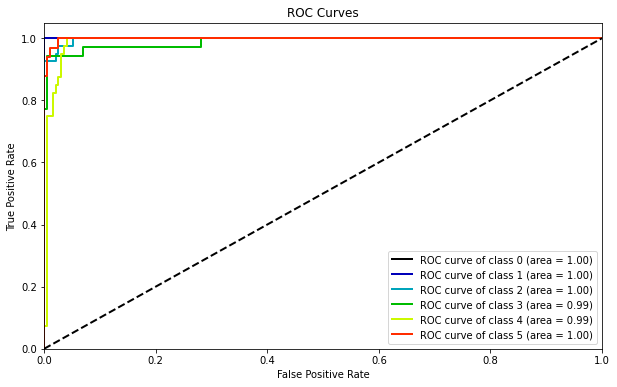

In [340]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

[23:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 96.6%
F1 Score = 96.6%

 Confusiton Matrix:
 [[38  0  0  0  0  0]
 [ 1 47  0  0  0  0]
 [ 1  0 38  0  1  0]
 [ 0  0  0 33  2  0]
 [ 0  0  1  0 39  0]
 [ 0  0  0  0  2 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.98      0.99        48
           2       0.97      0.95      0.96        40
           3       1.00      0.94      0.97        35
           4       0.89      0.97      0.93        40
           5       1.00      0.94 

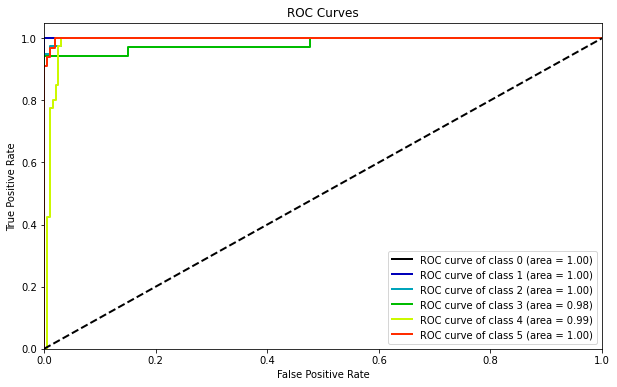

In [333]:
from xgboost import XGBClassifier

XGB = XGBClassifier().fit(Train_X_std, Train_Y)
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

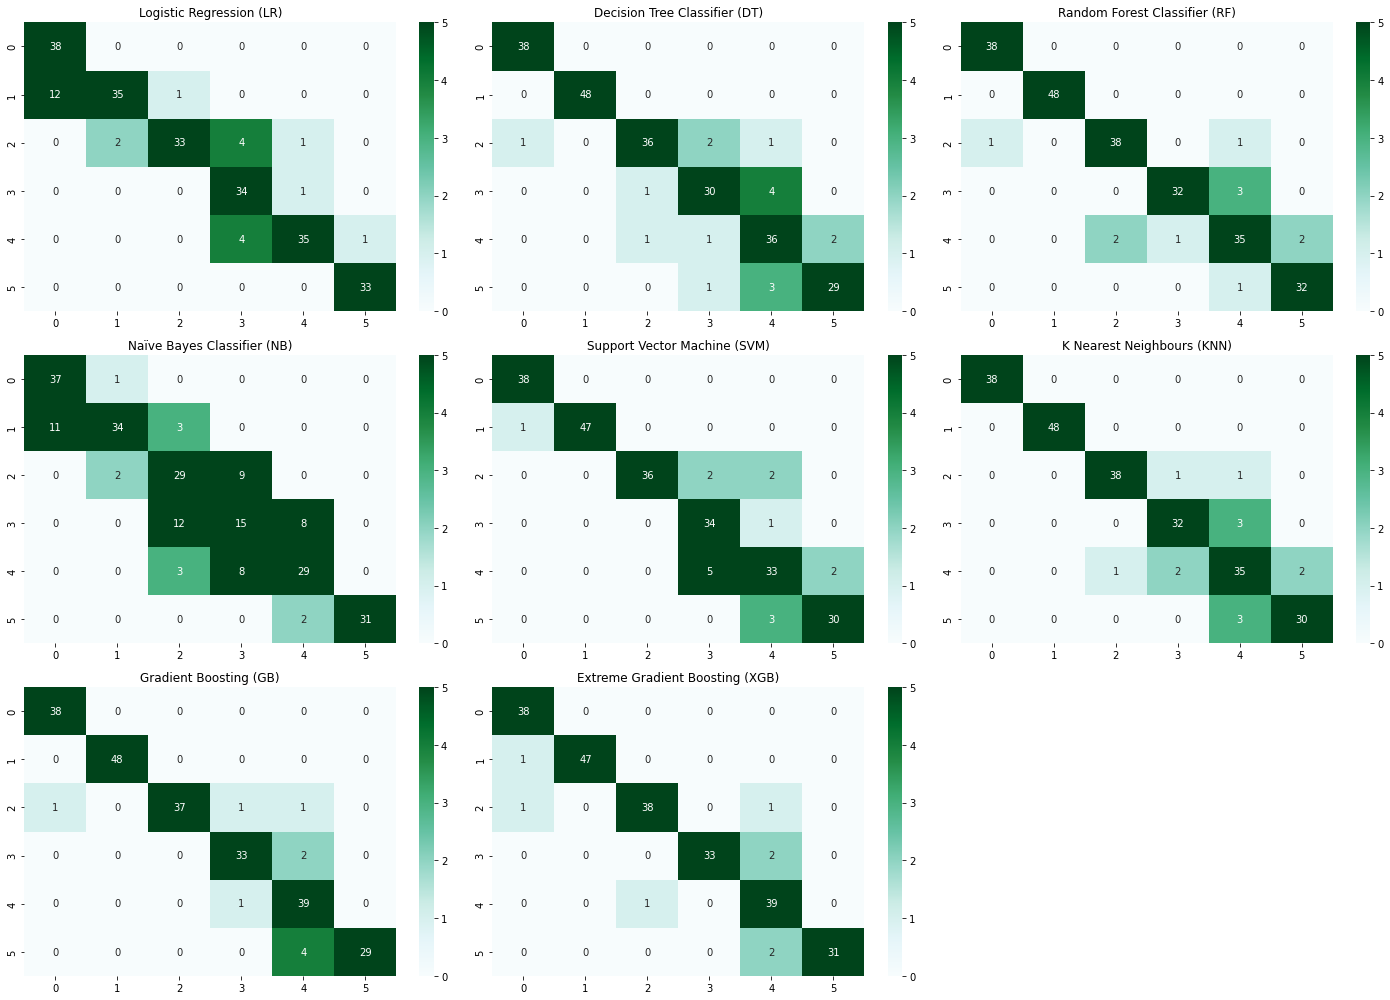

In [376]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', vmin=0,vmax=5)
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

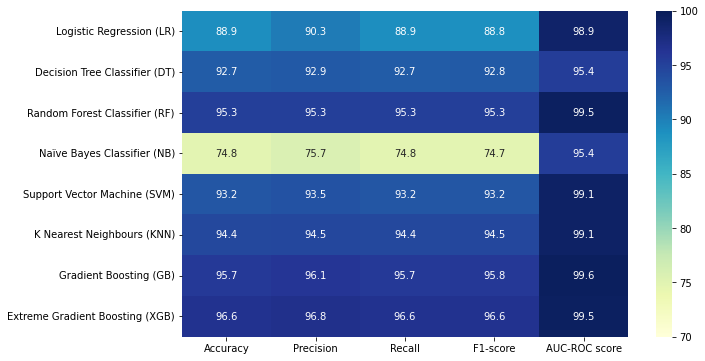

In [338]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=70.0, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1-score. Except Naive Baye's Classifier, most of the algorithms perform well. The best performing algorithm is Extreme Gradient Boosting Classifier...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 500 samples & after preprocessing 2.2%a of the datasamples were dropped. 
- The samples were highly imbalanced, hence SMOTE Technique was applied on the data to  balance the classes, adding 36.6% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Feature Selection/Eliminination was not carried out due to less number of features.
- Testing multiple algorithms with default hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The ensemble & boosting algorithms perform the best on the current dataset, followed by Nearest Neighbours Algorithm.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive.

In [ ]:
<<<----------------------------------------------------THE END------------------------------------------------------------->>>